**In this tutorial we show how Python and its graphics libraries can be used to create the two most common types of distributional plots: histograms and boxplots**

#1. Preliminaries

In [4]:
# Step 1: import packages with an alias
import pandas as pd
url ="https://www.dropbox.com/s/dmhumwapmrqe4j0/Bank.csv?dl=1" # You can load data directly from a dropbox link - just make sure dl=1 in the end
bank = pd.read_csv(url) # assign data to an object (dataframe) called bank. You can name this whatever you like

In [14]:
#check the data is loaded properly
bank.head() # returns the top 5 lines of the data



,Employee,EducLev,JobGrade,YrHired,YrBorn,Gender,YrsPrior,PCJob,Salary,Mgmt
0,1,3,1,92,69,Male,1,No,32.0,Non-Mgmt
1,2,1,1,81,57,Female,1,No,39.1,Non-Mgmt
2,3,1,1,83,60,Female,0,No,33.2,Non-Mgmt
3,4,2,1,87,55,Female,7,No,30.6,Non-Mgmt
4,5,3,1,92,67,Male,0,No,29.0,Non-Mgmt


In [ ]:
bank.tail() # returns the bottom 5 lines of data

# 2. Basic Descriptive Stats

Pandas provides basic descriptive statistic functions as methods of the Series object. Recall that each DataFrame object consists of multiple Series (columns). Thus, the average salary for bank employees can be found as:

In [9]:
bank['Salary'].mean()

39.92192307692307

Similarly, using a variable to save some typing:

In [10]:
sal = bank['Salary'] # save a variable or object called sal as a shortcut
sal.min(), sal.mean(), sal.median(), sal.max()  # calculate min, mean, median, etc.. on this variable sal

(26.7, 39.92192307692307, 37.0, 97.0)

To get desc statistical summary of all numerical columns using the describe() method:

In [ ]:
bank.describe() # summary stats for all variables in your data

#3. Visualizing Distributions -  histograms and boxplots
There are multiple packages that do this - i'm showing you Seaborn here

In [12]:
# load the library
import seaborn as sns


Creating Histograms -- use the histplot() function

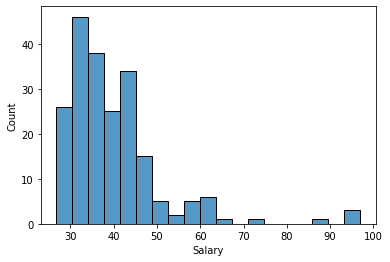

In [13]:
# create a histogram for Salary
sns.histplot(x=bank['Salary'])

In [ ]:
# Now repeat the same for another variable, say education level
# replace the variable from the last command

A few things to notice about this output

    The histplot() method returns an AxesSubplot value. Since we don’t need this (or even know what it is), we can clean-up our output in ending each Seaborn (or Matplotlib) call with a semicolon.

    Seaborn guesses at a good number of bins. But recall that the point of a histogram is to get a rough sense of the shape of the distribution of the variable. We can certainly change the number of bins (to say 10 or 12), but it is not critical.

We can pass some arguments to the method to get a more elaborate histogram. Turning on the kernel density estimate (kde=True) gives us a smoothed “kernel density” line, to get the pdf

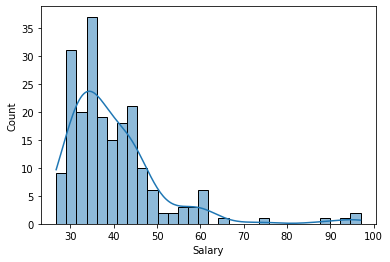

In [17]:
sns.histplot(x=bank['Salary'], bins=30, kde=True);

Of course, it is possible to change colors, and so on

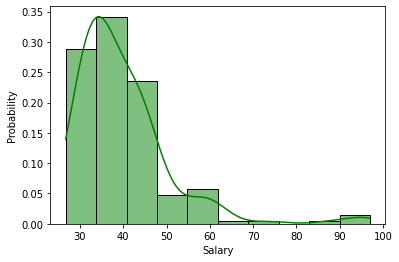

In [19]:
sns.histplot(x=bank['Salary'], 
             bins=10, kde=True,
             stat="probability", # choosing probability on y axis instead of count
             color='green' 
            );

Now let's create a boxplot!

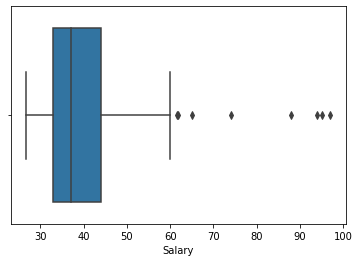

In [20]:
sns.boxplot(x=bank['Salary']);

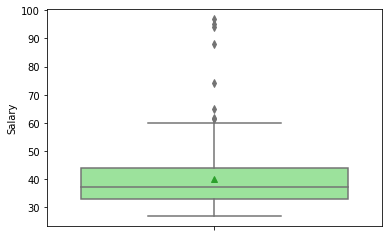

In [23]:
# if you want to change orientation,just use y variable instead of x
sns.boxplot(y=bank['Salary'],  color='lightgreen', showmeans=True); # showmeans shows you the mean (triangle point) wheras box plot shows median

#4. Analyzing multiple Variables

Say we want to compare distributions across variables, 

In [ ]:
# e.g., quick comparison of the distribution of salary by gender.
sns.boxplot(y=bank['Salary'], x=bank['Gender'], showmeans=True);

In [ ]:
# now let's repeat by another variable - job grade
sns.boxplot(y=bank['Salary'], x=bank['JobGrade'].astype('category'), showmeans=True);

We could also use 'faceted' visuals - breaking up visualizations by a facet

In [ ]:
#e.g., histogram of salary for each gender

In [ ]:
sns.displot(x='Salary', row='Gender', data=bank, linewidth=0, kde=True);

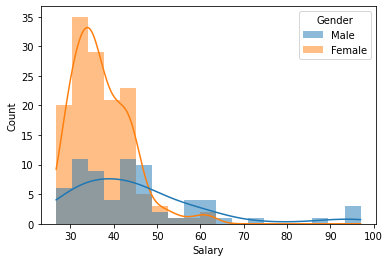

In [30]:
# to get an overlayed figure
sns.histplot(x='Salary', hue='Gender', data=bank, linewidth=0, kde=True);

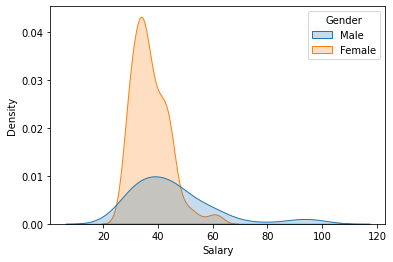

In [31]:
# or you could just plot the density plots
sns.kdeplot(x='Salary', hue='Gender', data=bank, shade=True); # you are choosing to color by variable gender